In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('books.csv')
sel_cols = ['title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count', 'small_image_url']
df = df[sel_cols]

# get Harry Potter books written by J.K. Rowling
authors = df.authors.unique()
jkr = [i for i in authors if i.find('J.K. Rowling') != -1]
jkr_books = df.loc[df.authors.isin(jkr)]
all_titles = jkr_books.title.unique()
hp_titles = [i for i in all_titles if i.find('Harry Potter and ') != -1]
hp_books = jkr_books.loc[jkr_books.title.isin(hp_titles)]
hp_books = hp_books.sort_values(by=['original_publication_year'], ascending=True)
hp_books

title  \
1   Harry Potter and the Sorcerer's Stone (Harry P...   
9   Harry Potter and the Chamber of Secrets (Harry...   
6   Harry Potter and the Prisoner of Azkaban (Harr...   
10  Harry Potter and the Goblet of Fire (Harry Pot...   
8   Harry Potter and the Order of the Phoenix (Har...   
12  Harry Potter and the Half-Blood Prince (Harry ...   
11  Harry Potter and the Deathly Hallows (Harry Po...   

                                    authors  original_publication_year  \
1               J.K. Rowling, Mary GrandPré                     1997.0   
9               J.K. Rowling, Mary GrandPré                     1998.0   
6   J.K. Rowling, Mary GrandPré, Rufus Beck                     1999.0   
10              J.K. Rowling, Mary GrandPré                     2000.0   
8               J.K. Rowling, Mary GrandPré                     2003.0   
12              J.K. Rowling, Mary GrandPré                     2005.0   
11              J.K. Rowling, Mary GrandPré                     2007.0   

    average_rating  ratings_count  \
1             4.44        4602479   
9             4.37        1779331   
6             4.53        1832823   
10            4.53        1753043   
8             4.46        1735368   
12            4.54        1678823   
11            4.61        1746574   

                                      small_image_url  
1   https://images.gr-assets.com/books/1474154022s...  
9   https://images.gr-assets.com/books/1474169725s...  
6   https://images.gr-assets.com/books/1499277281s...  
10  https://images.gr-assets.com/books/1361482611s...  
8   https://images.gr-assets.com/books/1387141547s...  
12  https://images.gr-assets.com/books/1361039191s...  
11  https://images.gr-assets.com/books/1474171184s...

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


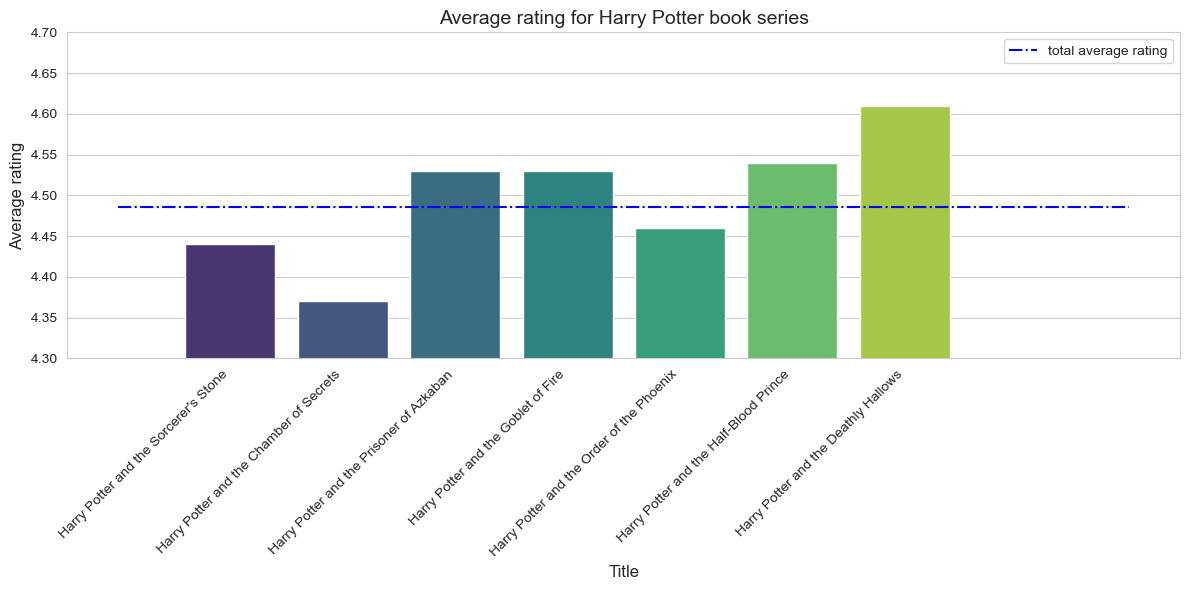

In [3]:
titles = hp_books.title.tolist()
titles = [title[:title.find(' (')] for title in titles]

weighted_avg = (hp_books.average_rating * hp_books.ratings_count).sum() / hp_books.ratings_count.sum()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=titles, y=hp_books.average_rating, palette="viridis")
plt.xlabel('Title', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.ylim((4.3, 4.7))
plt.hlines(weighted_avg, xmin=-1, xmax=8, color='blue', linestyles='dashdot', label='total average rating')
plt.title('Average rating for Harry Potter book series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()